# Analysis of an astronomical simulation of an equilibrium stellar system

In this initial part of the notebook we want to analize the initial conditions of the simulation. 

The data represents an equilibrium, spherical and isotropic system of stars with different masses, that can be used to model a (globular) stellar cluster: https://en.wikipedia.org/wiki/Star_cluster

We will check that both the system mass spectrum and density profile correspond to what we want it to be (and I generated it to be). Chekcing your initial conditions (consistency check) is an important step when you run a numerical simulation.

We will also check the system is in equilibrium, making sure that the Kinetic and Potential gravitational energy behave as expected.




The file `1000000.dat` has a different particle (star) in each row, and different columns are:

$x$    $y$    $z$    $v_x$    $v_y$    $v_z$    $m$
  
i.e. the cartesian spatial and velocity coordinates, and finally the mass.

For convenience, these simulations set the gravitational constant $G=1$. 

This implies that if you want to rescale the system to physical units, in principle you should multiply:

 - mass by $16 760$, to obtain the mass value in solar masses (a solar mass $M_\odot$ is $1.989\times10^{30}$ kg)
 - radius by $16$, to obtain the radius value in parsecs (one parsec [pc] is $3.086\times10^{16}$ m)
 - velocity by $2.123$ km/s
 - time (when obtained via internal units) by $7.38$ million years

In your code, I recommend sticking to units like solar masses, parsecs, million years, km/s. Even better, work with internal cod units (G=1) and -- only if you want -- only make plots/results in physical units.

Note: If you need it (possibly not): in physical units, the gravitational constant can be expressed as $G=4.3\times 10^{-3}$ pc M$_\odot ^{-1}$ $($km/s$)^2$

## Part 1: a first look at our data

1. Read the first snapshot named 1000000.dat. 
This is the initial condition of the simulation at time $t=0$. You may want to load it in a numpy array. (Remember to load all the modules that you may need!)

2. Visualize your data. You can plot the x-y projection (scatter plot) of the data (`plt.scatter`). It is supposed to be a spherical stellar system. Does it look like that? 
You can try to visualize it through a 2D histogram (`plt.hist2d`) to better understand your data. Suggestion: try using a logarithmic colormap.

3. Plot the histogram of the mass distribution. Hint: for better visualization, set the y axis to logarithmic scale. The normalized mass distribution, if masses are converted in solar units, should follow $0.06030\times m^{-2.35}$. Is it the case? Compare the expected distribution to the histogram.

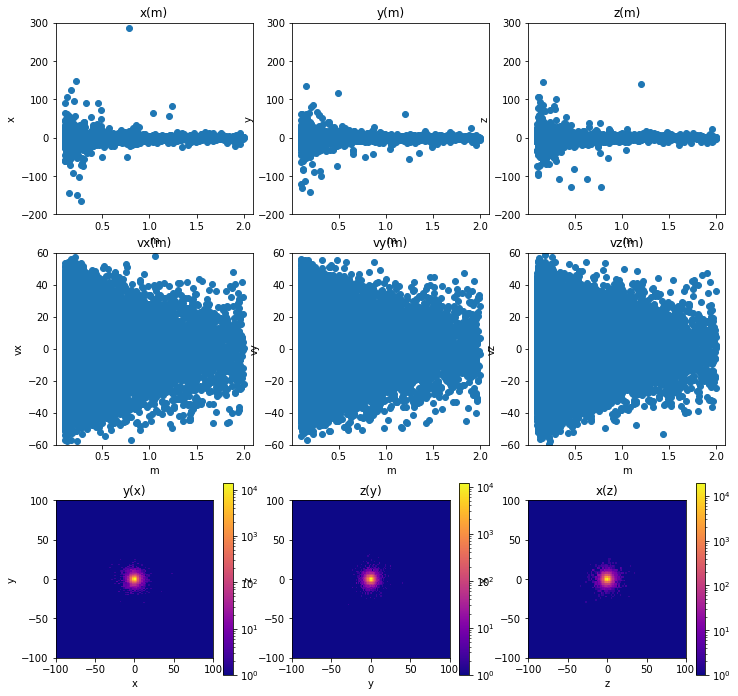

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy 
# first, I initialize the names of the variables that I'm going to
# use to store the data
pos=np.array(['x','y','z'])
vel=np.array(['vx','vy','vz'])
# then I use the same names I just initialized to save the files (you
# don't need the first backslash for Windows directories
x,y,z,vx,vy,vz,m=np.loadtxt('astro_project_data/1000000.dat',
                            unpack=True)
# finally, I plot 
fig,ax=plt.subplots(3,3,figsize=(12,12))
# I visually examine:
# - the correlation between spatial coordinates and the mass
r=0
for c in range(3):
    ax[r][c].scatter(eval('m')*16760,eval(pos[c])*16)
    ax[r][c].set_xlabel('m')
    ax[r][c].set_ylabel(pos[c])
    ax[r][c].set_ylim(-200,300)
    ax[r][c].set_title(pos[c]+'(m)')
# - the correlation between the components of the velocit and the mass
r=1
for c in range(3):
    ax[r][c].scatter(eval('m')*16760,eval(vel[c])*16)
    ax[r][c].set_xlabel('m')
    ax[r][c].set_ylabel(vel[c])
    ax[r][c].set_ylim(-60,60)
    ax[r][c].set_title(vel[c]+'(m)')
# - the correlation between the different spacial coordinates  
r=2
temp=np.array(['y','z','x'])
for c in range(3):
# when representing, we transform into physical units by multiplying
# times 16 also, to avoid the elimination of the white that comes up
# with the logarithmic scale, we need to make a couple of adjustments:
    cmap=copy.copy(mpl.cm.get_cmap('plasma'))
    cmap.set_bad(cmap(0))
    thing = ax[r][c].hist2d(eval(pos[c])*16,
                            eval(temp[c])*16,bins=200,
                            norm=mpl.colors.LogNorm(),
                            cmap=cmap)
    ax[r][c].set_xlabel(pos[c])
    ax[r][c].set_ylabel(temp[c])
    ax[r][c].set_xlim(-100,100)
    ax[r][c].set_ylim(-100,100)
    ax[r][c].set_aspect(1)
    plt.colorbar(thing[3],ax=ax[r][c])
    ax[r][c].set_title(temp[c]+'('+pos[c]+')')

[0.07072144 2.19642944]


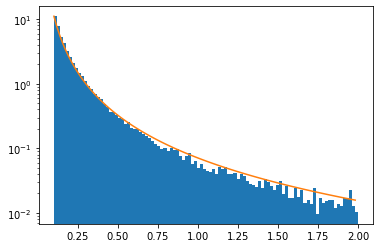

In [2]:
from scipy.optimize import curve_fit
fig,ax=plt.subplots(1,1,figsize=(6,4))
def f_fit(x,a,b):
    return a*x**(-b)
n,bins,patches=ax.hist(m*16760,bins=100,density=True)
pars,cov=curve_fit(f_fit,bins[:-1],n,p0=[0.06030,2.35]) 
ax.plot(bins[:-1],f_fit(bins[:-1],pars[0],pars[1]))
ax.set_yscale('log')
print(pars)
plt.show()
# the compatibility is plausible because the estimated parameter are
# not far from the theoretical values

## Part 2: let's understand something about our data

1. Infer what is the density profile of the system as a function of the radius. You should bin your data into spherical shells and divide the mass in your spherical shell by the shell volume! Try to use both linear and logarithmic binning. Plot the results in a log-log scale. Compare the results with the expected profile (Plummer density profile):

$\rho(r) = \frac{3M_0}{4\pi r_0^3}\left(1+\frac{r^2}{r_0^2}\right)^{-5/2}$

with $M_0$ total mass of the system, equal to 1 in internal units and to 16760 in solar masses; $r_0$ scale radius of the system, equal to 0.1 in internal units and to 1.6 pc.

2. Compute the kinetic ($K$), potential ($U$), total energy ($E$) of the gravitational system. Compute the virial ratio, defined as $-2K/U$.  Note: it would take forever if you do not optimize the computation. IMPORTANT: start with UNDERSAMPLED data -- even with just 100 entries. It is strongly recommended to work in internal code units.

3. Write a routine that computes the lagrangian radii, defined as the radii including a given fraction of mass of the system, as 1%, 10%, 20%... Consider doing your testing with undersampled data. As a first simple attempt, you may want to assume all particles have the same mass (hint: consider using a sorting function). Consider the fact that particles have a different mass only in a second step. To check your results, you can compare what you found with the analytical expectation: $frac = M(r)/ M_0 = \frac{r^3}{(r^2+r_0^2)^{3/2}}$



Remember:

Total gravitational potential energy $U = -\sum_{i=1}^N m_i \sum_{j<i} Gm_j/\sqrt{(\mathbf{r}_j-\mathbf{r}_i)^2}$

Total kinetic energy $K = \frac 1 2 \sum_{i=1}^N m_i v_i^2$

$E = K+U$

$m$ are the masses, $\mathbf{r}$ are the position vectors, $G$ is the gravitational constant, $v$ is the modulus of the velocity vector. $i,j$ are indexes running on all the particles.



[0.25956792 0.10564505]  compared to the starting points  [0.23873241463784295, 0.1]


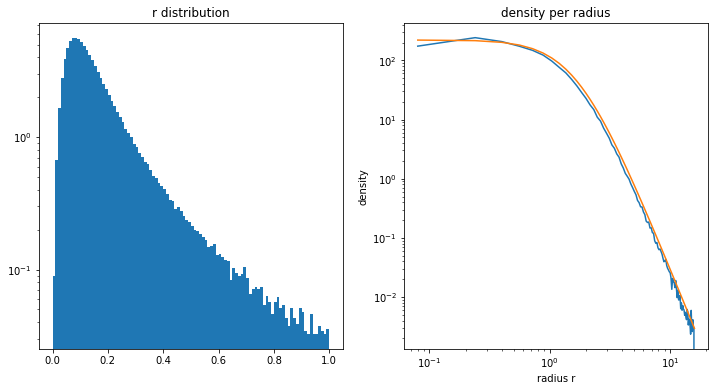

In [3]:
# 1
# firstly, I calculate the radiuses 
fig,ax=plt.subplots(1,2,figsize=(12,6))
# to visually examine the distribution
r=np.sqrt(x**2+y**2+z**2)
N=100
n,bins,patches=ax[0].hist(r,bins=N,density=True,range=(0,1))
ax[0].set_title('r distribution')
ax[0].set_yscale('log')
# I use the limits of the bins to calculate the shells from which
# volume I'm going to calculate the densities
r_int=bins[:-1]
r_ext=bins[1:]
shell_r=(r_int+r_ext)/2
shell_vol=4/3*np.pi*(r_ext**3-r_int**3)
# to isolate the corresponding masses, I consider each shell separately
shell_mass=np.zeros(len(shell_vol))
for i in range(N-1):
# to select the masses that fall inside each shell, I use a boolean
# mask that checks that the radius is greater than the lower (radius) 
# bound and smaller than the upper (radius) bound of the shell
    bm=(r>=r_int[i])*(r<r_ext[i])
    shell_mass[i]=m[bm].sum()
# I can finally calculate the density of each shell
shell_dens=shell_mass/shell_vol
# and plot it to visualize its dependence from the shell_dens
ax[1].plot(shell_r*16,shell_dens)
def f_fit(x,a,b):
    return a/b**3*(1+x**2/b**2)**(-5/2)
# I fit to see if the dependence complies with the theoretical model
# the starting points for the fit are
sp=[m.sum()*3/(4*np.pi),0.1]
pars,cov=curve_fit(f_fit,shell_r,shell_dens,p0=sp) 
print(pars,' compared to the starting points ',sp)
ax[1].plot(shell_r*16,f_fit(bins[:-1],pars[0],pars[1]),label='fit')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('radius r')
ax[1].set_ylabel('density')
ax[1].set_title('density per radius')
plt.show()

# a better strategy can be implemented by using logaritmic binning as
# well, which switches the noise from the right to the left side of
# the radius (see last part of correction)

In [5]:
# for the first couple of trials, I'm going to use a subset of the 
# data (aka undersampled data) to avoid extremely long iterations
# (since our data set is huge): 
# to be safe, I re-upload the data:
x,y,z,vx,vy,vz,m=np.loadtxt('astro_project_data/1000000.dat',
                            unpack=True)
# select the dimension of the undersampled data set to use:
N_small=300
idx_small=np.random.choice(range(len(x)),size=N_small,replace=False)
# we adjust the subset so that the total mass stays the same, by
# rescaling the values, to have the same statistical properties of
# the whole sistem
m_small=np.copy(m[idx_small])
m_small=m_small*m.sum()/m_small.sum()
x_small=np.copy(x[idx_small])
y_small=np.copy(y[idx_small])
z_small=np.copy(z[idx_small])
vx_small=np.copy(vx[idx_small])
vy_small=np.copy(vy[idx_small])
vz_small=np.copy(vz[idx_small])
r_small=np.sqrt(x_small**2+y_small**2+z_small**2)

In [10]:
# 2
# first, I compute the total kinetic energy
K=1/2*(m*(vx**2+vy**2+vz**2)).sum()
# for the potential energy:
# to simplify the problem, we set G=1 and work in internal units: we
# also define a function that, given a certain particle, calculates
# the contribute that the other particles have on its potential:
def compute_pot_en(r,m,part_idx):
# by selecting the elements (to avoid repetitions) through
# a boolean mask
    bm = np.arange(len(r)) > part_idx   
    r = np.abs(r[part_idx]-r[bm])
    return  np.sum(m[bm]/r)
# I then use said function to compose a vector with the potential of
# each particle, which needs to be multiplied to the corresponding
# mass to get the potential energy for each particle:
u = m_small*np.array( [compute_pot_en(r_small, m_small, part_idx)
                       for part_idx in range(len(r_small))] )
# I sum over the number of particles to get the total potential energy
U=-u.sum()
E=U+K
print('the total energy of the system is ',E,'while the fraction -2*K/U is',-2*K/U)

the total energy of the system is  -27.193966323826658 while the fraction -2*K/U is 0.10320569928227216


In [11]:
# 3
# first, we assume that the particles all have the same mass
# we re-upload the data 
x, y, z, vx, vy, vz, m = np.loadtxt("astro_project_data/1000000.dat", unpack=True) # reload the data to be sure we did not overwrite them
r = np.sqrt(x**2+y**2+z**2)
# I order it so that it's easy to calculate the partial sum
r_sorted = np.sort(r)
# and calculate the radius corresponding to some fractions
# of the total mass contained (which in this case is
# equivalent to the fraction of particle contained):
for frac in [0.01, 0.1, 0.2, 0.3, 0.4,0.5]:
    rlag = r_sorted[int(frac*len(x))]
    print(rlag )

0.022069097235496337
0.052435929535103815
0.07208051371258622
0.09011225566022359
0.10894223599531919
0.13044957704036922


In [12]:
# let's consider the general case, contemplating different masses:
# as before, we resort to the sorting trick but this time we just sort
# the indexes so that we can sort multiple objects in the same way:
# we sort based on the values of r:
sortid = np.argsort(r)
# and apply that sorting to the masses, transforming the vector into
# its cumulative sum:
cs = m[sortid].cumsum()/m.sum()
# lastly, we exploit the cumulative sum of the mass we just obtained
# to find the radius that contains the desired fraction of the mass
for frac in [0.01, 0.1, 0.2, 0.3, 0.4,0.5]:
# note that, in order to comprehend a fraction equal to 1 in the
# values we cycle over, the following lines of code may fall short
# because the identification (through np.where()) condition may not
# be satisfied just because of floating point operations (cs could 
# be always slightly smaller than exhactly 1) leading to having
# no index for such a case
# by identifying the index corresponding to the sorted vector
    idx = np.where(cs>=frac)[0][0]
# to then reach back to the initial vector
    rlag = r[sortid][idx]
    print("The Lagrangian Radius containing "+str(frac)+" is "+str(rlag)+'\n'+
          "The corresponding density prediction: "+str(rlag **3/(rlag**2+0.1**2)**(3/2)))

The Lagrangian Radius containing 0.01 is 0.022005145421669137
The corresponding density prediction: 0.0099258599069083
The Lagrangian Radius containing 0.1 is 0.052562868886509385
The corresponding density prediction: 0.10071993128843669
The Lagrangian Radius containing 0.2 is 0.07225398071182425
The corresponding density prediction: 0.20087970526258764
The Lagrangian Radius containing 0.3 is 0.09063488491039964
The corresponding density prediction: 0.3028682579405849
The Lagrangian Radius containing 0.4 is 0.10959046256288218
The corresponding density prediction: 0.40307527564795215
The Lagrangian Radius containing 0.5 is 0.1313215225422838
The corresponding density prediction: 0.5035809878498037


## Part 3: evolution of the stellar system in the simulation -- does it behave as we expect?

The datafiles `1000001.dat`, `1000002.dat`, ... have the same format as the initial conditions file above, but contain different snapshots of the simulation. The time interval between snapshots is 10 internal units (73.8 Million years).

1. Plot on the same figure the evolution of the density profile $\rho(r)$ at different times, and see how much it varies.

2. Plot the lagrangian radii as a function of time. Chose mass fractions including 0.01, 0.1, 0.2,.... 0.7 the total mass of the system. You can consider saving the lagrangian radii in a separate file, and reading them for the plot.

3. There is something unexpected happening to the system, to understand what is it, plot the data with a scatter plot as in the first part. Do you see what is happening? How can we solve it? Try solving the problem and, once done, 

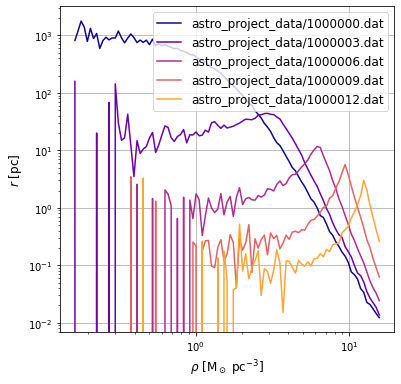

In [16]:
fs = 12
N = 100
r_log = np.logspace(-2,0,N)
r_mean_log = 10**((np.log10(r_log[1:])+np.log10(r_log[:-1]))*0.5)
# we want to plot the results for every data-set at the same time:
fig,ax=plt.subplots(figsize=(6,6))
ax.set_xscale('log')
ax.set_yscale('log')
# so for each 
for i in range(0,15,3):
# - get the data:
    snap = 'astro_project_data/'+str(1000000+i)+".dat"
    x, y, z, vx, vy, vz, m = np.loadtxt(snap, unpack=True)
    r = np.sqrt(x**2+y**2+z**2)
# - compute the density profile
    M_log = np.array([np.sum(m[(r>r_log[i]) & (r<=r_log[i+1])]) for i in range(N-1)])
    Vol_log = 4./3.*np.pi*(r_log[1:]**3-r_log[:-1]**3)
# - and plot it:
    plt.plot(r_mean_log*16, M_log*16760/Vol_log/(16**3), label=snap,
             c = mpl.cm.get_cmap("plasma")(i/15))
ax.set_xlabel(r"$\rho$ [M$_\odot$ pc$^{-3}$]",fontsize=fs)
ax.set_ylabel(r"$r$ [pc]",fontsize=fs)
ax.legend(fontsize=fs)
plt.grid()
plt.show()
# so the peaking density is moving towards the right through time 
# we expect a similar behaviour within the Lagrangian radiai (which
# grow if the system is expanding through time)

In [20]:
# lagrangian radii:
# first of all, we want to define an output file to write:
outfile = open("lagrad.txt", "w")
# for each one of the files:
for i in range(15):
# we upload it
    snap = 'astro_project_data/'+str(1000000+i)+".dat"
    x, y, z, vx, vy, vz, m = np.loadtxt(snap, unpack=True)
# compute the radiai
    r = np.sqrt(x*x+y*y+z*z)
# sort them 
    idsort = np.argsort(r)
# get the normalized cumulative sum of the masses
    cs = np.cumsum(m[idsort])/np.sum(m[idsort])
# and save the time in the output file
    outfile.write(str(i*10)+"     ")
    for frac in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
# together with radiai that correspond to the fixed fractions
        rlag = r[idsort[cs>=frac][0]]
        outfile.write(str(rlag)+"  " )
    outfile.write("\n" )
# finally, I close the file
outfile.close()    

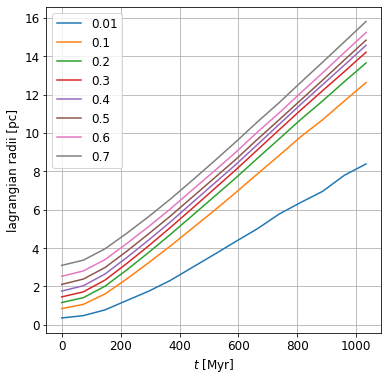

In [21]:
# lagrangian radii: plot the data
fig,ax = plt.subplots(figsize=(6,6))
fs=12
plt.xlabel(r"$t$ [Myr]",fontsize=fs)
plt.ylabel(r"lagrangian radii [pc]",fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
t, R0, R1, R2, R3, R4, R5, R6, R7 = np.loadtxt("lagrad.txt",
                                               unpack=True)
plt.plot(t*7.38, R0*16, label=0.01)
plt.plot(t*7.38, R1*16, label=0.1)
plt.plot(t*7.38, R2*16, label=0.2)
plt.plot(t*7.38, R3*16, label=0.3)
plt.plot(t*7.38, R4*16, label=0.4)
plt.plot(t*7.38, R5*16, label=0.5)
plt.plot(t*7.38, R6*16, label=0.6)
plt.plot(t*7.38, R7*16, label=0.7)

plt.legend(fontsize=fs)
plt.grid()
plt.show() 

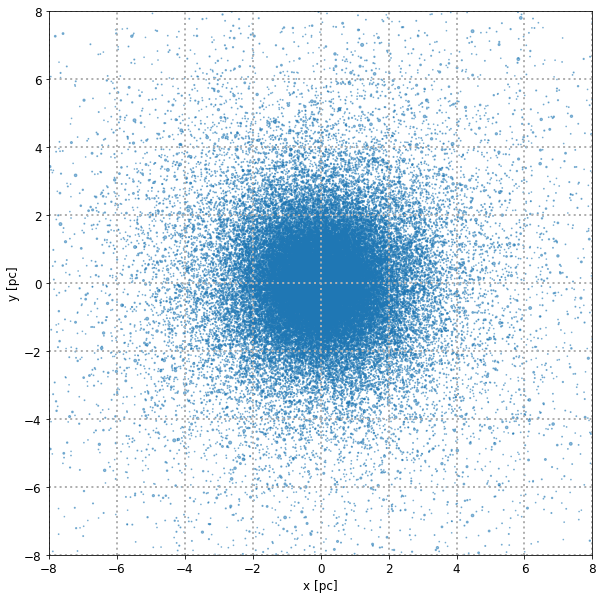

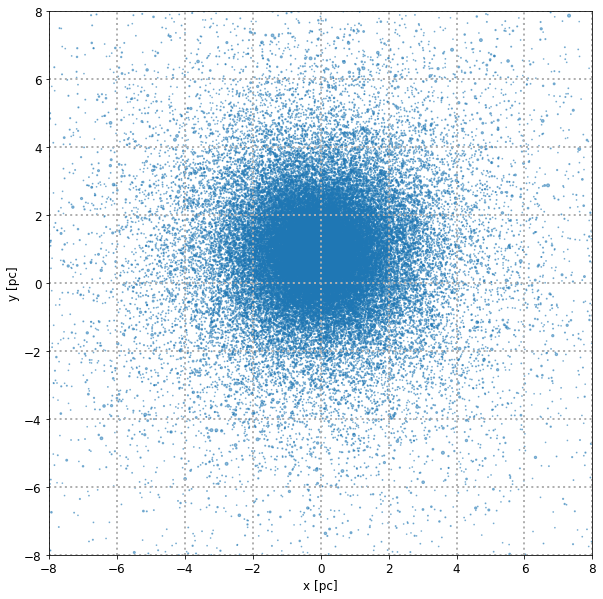

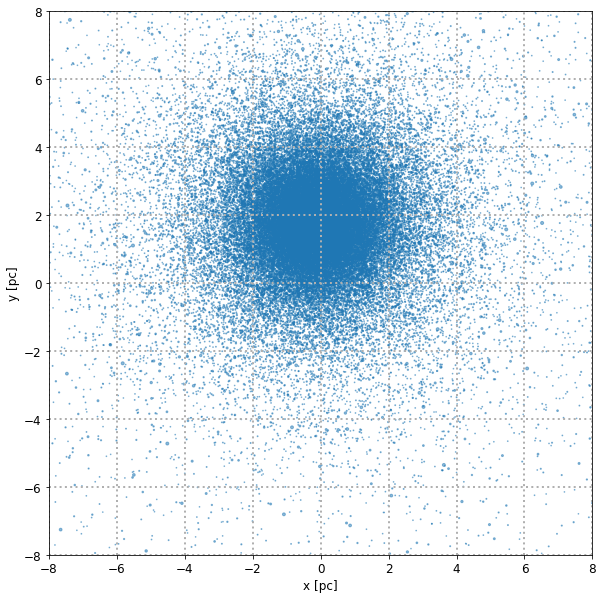

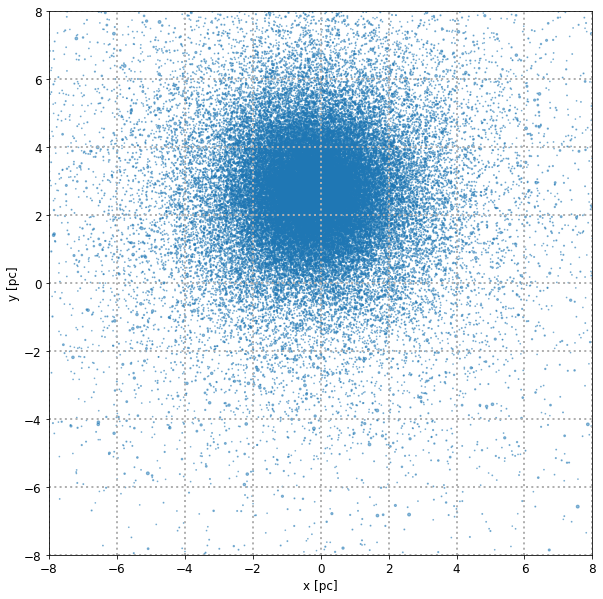

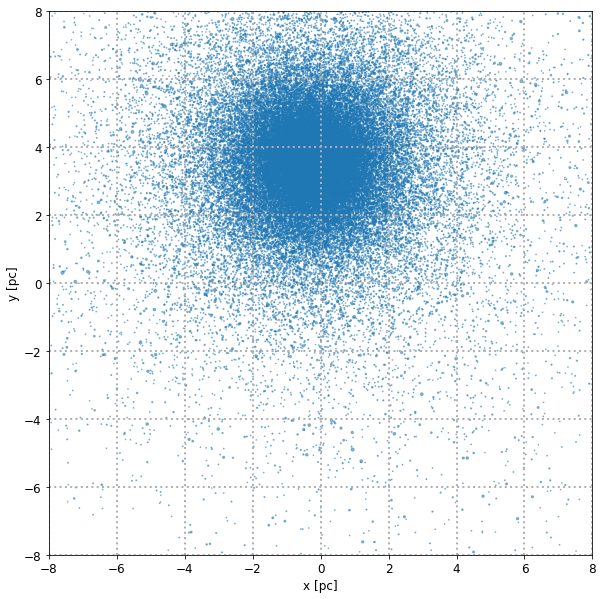

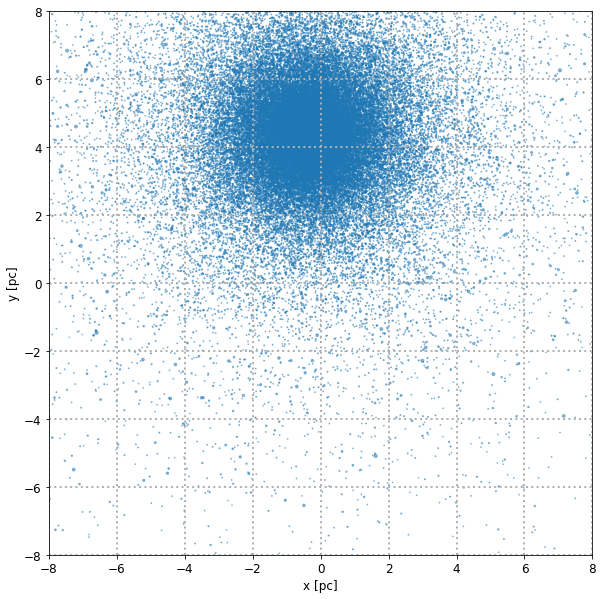

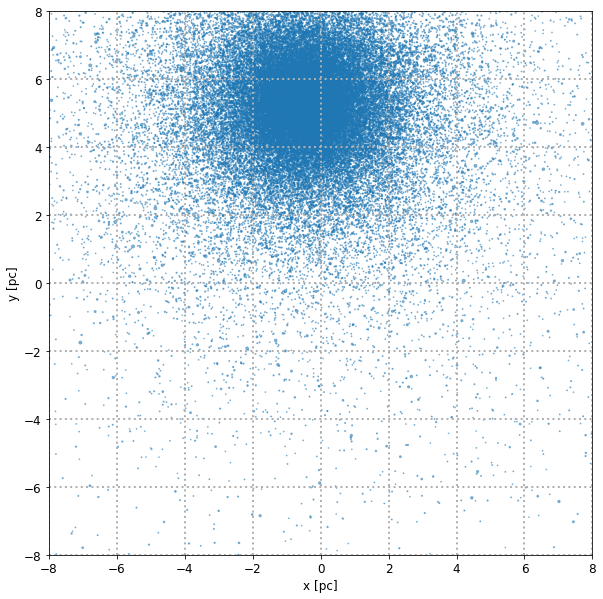

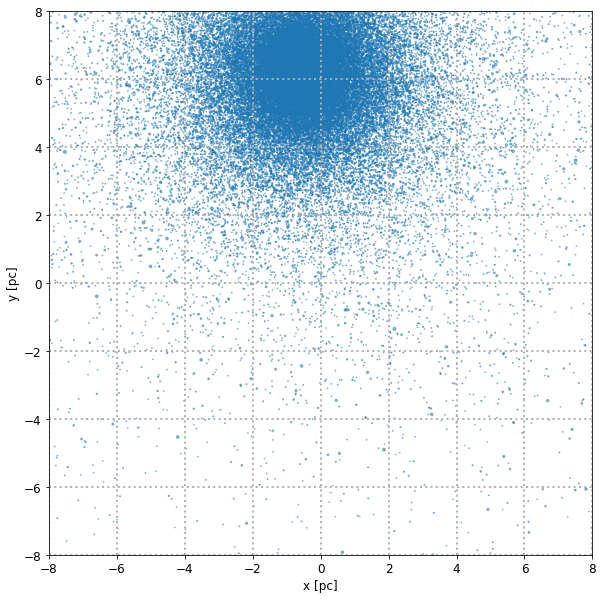

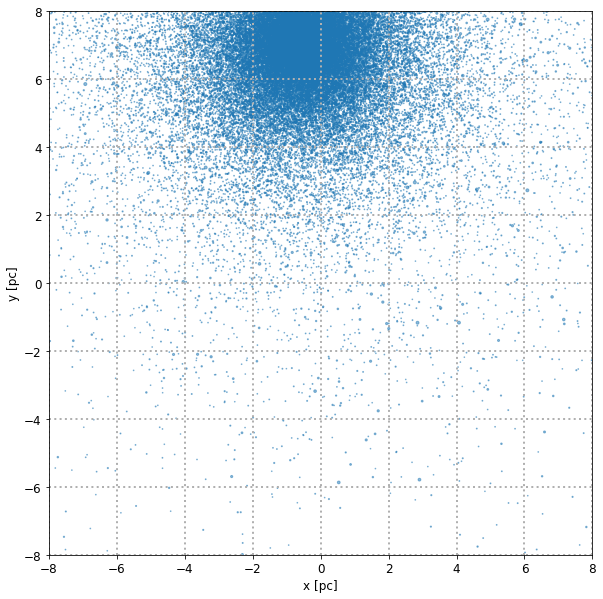

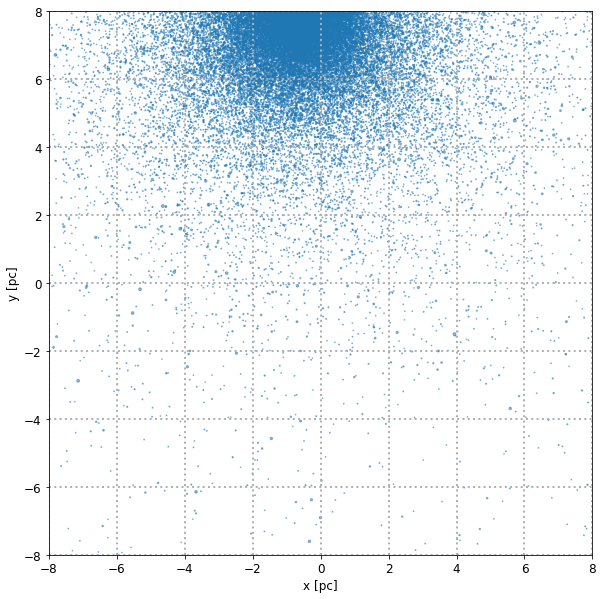

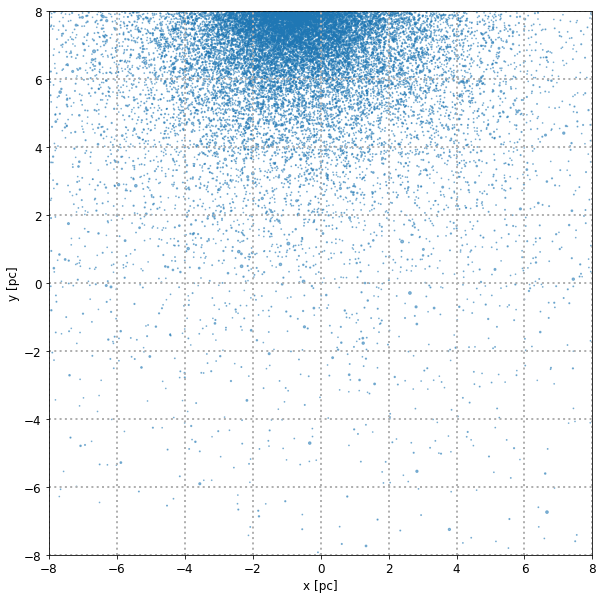

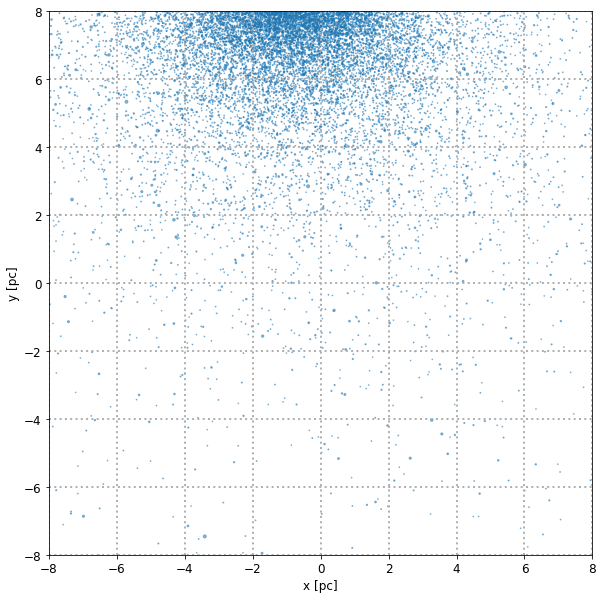

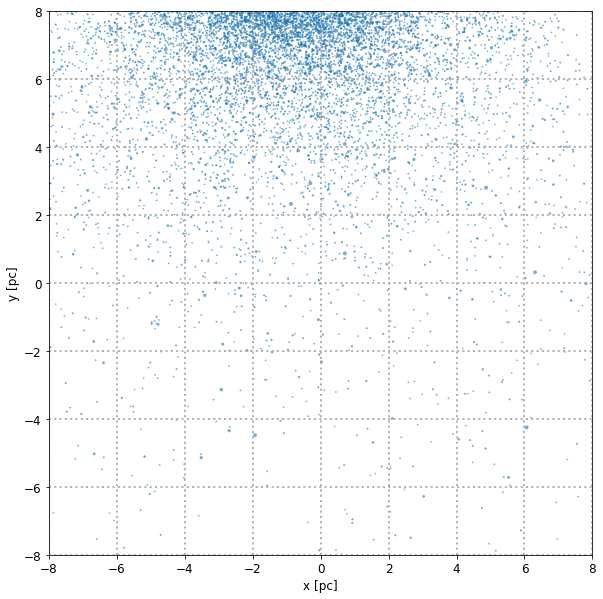

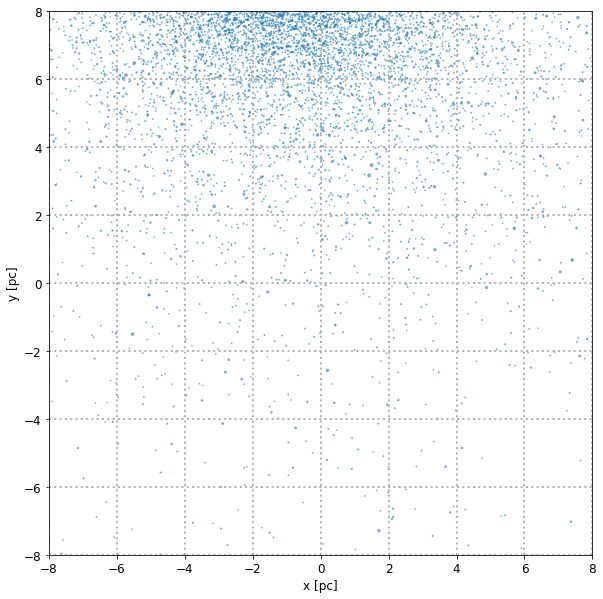

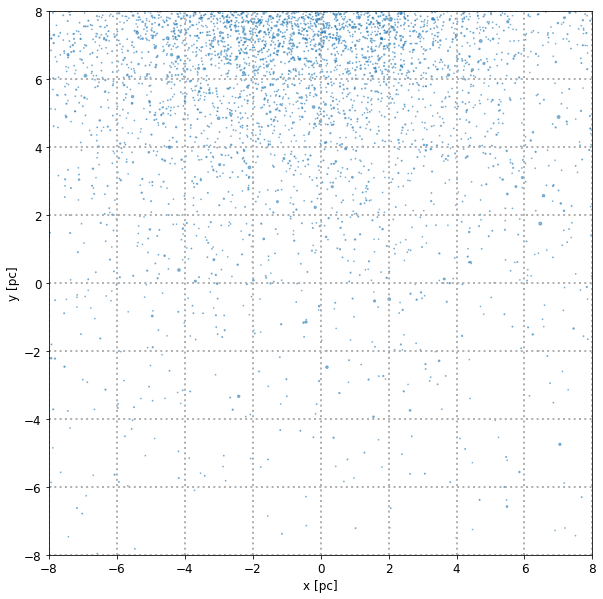

In [23]:
# to check what happens to the 
for i in range(15):
    snap = 'astro_project_data/'+str(1000000+i)+".dat"
    x, y, z, vx, vy, vz, m = np.loadtxt(snap, unpack=True)
    fig,ax = plt.subplots(figsize=(10,10))
    plt.scatter(x*16,y*16, s=m*80000, alpha=0.5) # 80000 is totally arbitrary!!
    plt.gca().set_aspect(1) # <-- this means that x and y axes have the same scale and the plot is not distorted
    L=8
    fs=12
    plt.xlim(-L,L)
    plt.ylim(-L,L)
    plt.xlabel("x [pc]", fontsize=fs)
    plt.ylabel("y [pc]", fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.grid(ls=":", lw=2)
    plt.show()

R0 = 14.0 DELTAR = 0.0014818486684005803
R0 = 9.799999999999999 DELTAR = 0.0009240629232977491
R0 = 14.0 DELTAR = 0.06568788636010593
R0 = 9.799999999999999 DELTAR = 0.0009349800779830227
R0 = 14.0 DELTAR = 0.13087573877720848
R0 = 9.799999999999999 DELTAR = 0.0008650197331074408
R0 = 14.0 DELTAR = 0.19606855203835818
R0 = 9.799999999999999 DELTAR = 0.0008418441706096784
R0 = 14.0 DELTAR = 0.2612626155896521
R0 = 9.799999999999999 DELTAR = 0.0007953849512460384
R0 = 14.0 DELTAR = 0.32645717275710395
R0 = 9.799999999999999 DELTAR = 0.0008781180826609695
R0 = 14.0 DELTAR = 0.39165198056939643
R0 = 9.799999999999999 DELTAR = 0.00089255396038795
R0 = 14.0 DELTAR = 0.4568469265548624
R0 = 9.799999999999999 DELTAR = 0.0009680168027689145
R0 = 14.0 DELTAR = 0.5220419532280722
R0 = 9.799999999999999 DELTAR = 0.0010218735038244556
R0 = 6.8599999999999985 DELTAR = 0.0009604741838698432
R0 = 14.0 DELTAR = 0.5872370386046861
R0 = 9.799999999999999 DELTAR = 0.001069806460178517
R0 = 6.8599999999999

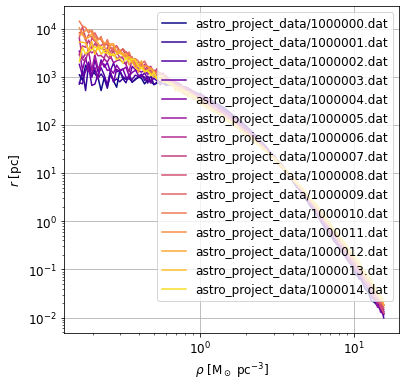

In [31]:
# from the previous projections we see that the star cluster stays
# in x=0 through time but moves in the y (positive) directions:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

fig,ax = plt.subplots(figsize=(6,6))
plt.xscale("log")
plt.yscale("log")
fs=12
N=100
r_log = np.logspace(-2, 0, N)
r_mean_log = 10**((np.log10(r_log[1:])+np.log10(r_log[:-1]))*0.5)
    
for i in range(15):
    snap = 'astro_project_data/'+str(1000000+i)+".dat"    
    x, y, z, vx, vy, vz, m = np.loadtxt(snap, unpack=True)
    xp=np.copy(x)
    yp=np.copy(y)
    zp=np.copy(z)
    mp=np.copy(m)
    r0 = 20
    for jc in range(10):
        rp = np.sqrt(xp*xp+yp*yp+zp*zp) 
        cond = rp<r0
        M = mp[cond].sum()
        x0 = (xp[cond]*mp[cond]).sum()/M
        y0 = (yp[cond]*mp[cond]).sum()/M
        z0 = (zp[cond]*mp[cond]).sum()/M
        xp -= x0
        yp -= y0
        zp -= z0
        if r0>0.5:
            r0*=0.7
        deltar = np.sqrt(x0**2+y0**2+z0**2)
        print("R0 = "+str(r0)+" DELTAR = "+str(deltar))
        if deltar<1e-3:
            break
    xc = x[0] - xp[0]
    yc = y[0] - yp[0]
    zc = z[0] - zp[0]
    x-=xc
    y-=yc
    z-=zc
    r = np.sqrt(x**2+y**2+z**2)
    M_log = np.array([np.sum(m[(r>r_log[i]) & (r<=r_log[i+1])]) for i in range(N-1)])
    Vol_log = 4./3.*np.pi*(r_log[1:]**3-r_log[:-1]**3)
    plt.plot(r_mean_log*16, M_log*16760/Vol_log/(16**3),label=snap,
             c = mpl.cm.get_cmap("plasma")(i/15))
    
plt.xlabel(r"$\rho$ [M$_\odot$ pc$^{-3}$]",fontsize=fs)
plt.ylabel(r"$r$ [pc]",fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.grid()
plt.show()

In [32]:
# lagrangian radii: save the file
outfile = open("lagrad.txt", "w")
for i in range(15):
    snap = 'astro_project_data/'+str(1000000+i)+".dat"
    x, y, z, vx, vy, vz, m = np.loadtxt(snap, unpack=True)
    
    xp=np.copy(x)
    yp=np.copy(y)
    zp=np.copy(z)
    mp=np.copy(m)
    r0 = 20
    for jc in range(10):
        rp = np.sqrt(xp*xp+yp*yp+zp*zp) 
        cond = rp<r0
        M = mp[cond].sum()
        x0 = (xp[cond]*mp[cond]).sum()/M
        y0 = (yp[cond]*mp[cond]).sum()/M
        z0 = (zp[cond]*mp[cond]).sum()/M
        xp -= x0
        yp -= y0
        zp -= z0
        if r0>0.5:
            r0*=0.7
        deltar = np.sqrt(x0**2+y0**2+z0**2)
        print("R0 = "+str(r0)+" DELTAR = "+str(deltar))
        if deltar<1e-3:
            break
    xc = x[0] - xp[0]
    yc = y[0] - yp[0]
    zc = z[0] - zp[0]
    
    
    x-=xc;y-=yc;z-=zc
    
    r = np.sqrt(x*x+y*y+z*z)
    idsort = np.argsort(r)
    cs = np.cumsum(m[idsort])/np.sum(m[idsort])
    outfile.write(str(i*10)+"     ")
    for frac in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
        rlag = r[idsort[cs>=frac][0]]
        outfile.write(str(rlag)+"  " )
    outfile.write("\n" )
outfile.close() 

R0 = 14.0 DELTAR = 0.0014818486684005803
R0 = 9.799999999999999 DELTAR = 0.0009240629232977491
R0 = 14.0 DELTAR = 0.06568788636010593
R0 = 9.799999999999999 DELTAR = 0.0009349800779830227
R0 = 14.0 DELTAR = 0.13087573877720848
R0 = 9.799999999999999 DELTAR = 0.0008650197331074408
R0 = 14.0 DELTAR = 0.19606855203835818
R0 = 9.799999999999999 DELTAR = 0.0008418441706096784
R0 = 14.0 DELTAR = 0.2612626155896521
R0 = 9.799999999999999 DELTAR = 0.0007953849512460384
R0 = 14.0 DELTAR = 0.32645717275710395
R0 = 9.799999999999999 DELTAR = 0.0008781180826609695
R0 = 14.0 DELTAR = 0.39165198056939643
R0 = 9.799999999999999 DELTAR = 0.00089255396038795
R0 = 14.0 DELTAR = 0.4568469265548624
R0 = 9.799999999999999 DELTAR = 0.0009680168027689145
R0 = 14.0 DELTAR = 0.5220419532280722
R0 = 9.799999999999999 DELTAR = 0.0010218735038244556
R0 = 6.8599999999999985 DELTAR = 0.0009604741838698432
R0 = 14.0 DELTAR = 0.5872370386046861
R0 = 9.799999999999999 DELTAR = 0.001069806460178517
R0 = 6.8599999999999

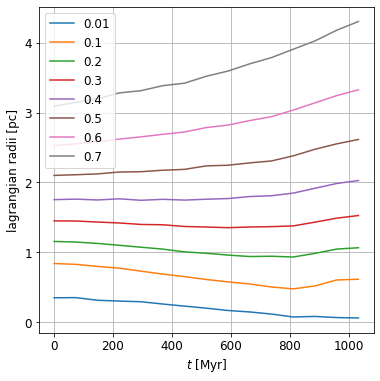

In [33]:
# lagrangian radii: plot the data
fig,ax = plt.subplots(figsize=(6,6))
fs=12
plt.xlabel(r"$t$ [Myr]",fontsize=fs)
plt.ylabel(r"lagrangian radii [pc]",fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)


t, R0, R1, R2, R3, R4, R5, R6, R7 = np.loadtxt("lagrad.txt", unpack=True)
plt.plot(t*7.38, R0*16, label=0.01)
plt.plot(t*7.38, R1*16, label=0.1)
plt.plot(t*7.38, R2*16, label=0.2)
plt.plot(t*7.38, R3*16, label=0.3)
plt.plot(t*7.38, R4*16, label=0.4)
plt.plot(t*7.38, R5*16, label=0.5)
plt.plot(t*7.38, R6*16, label=0.6)
plt.plot(t*7.38, R7*16, label=0.7)

plt.legend(fontsize=fs)
plt.grid()
plt.show()